## Постановка задачи

Исследование направленное на подтверждение (или опровержение) идеи, что золото является защитным активом во время кризиса.

**Замечание**. Кризис в одной отдельной стране не рассматривается, так как, в большинстве случаев, защитным активом явлеяется покупка иностранной валюты (например).

Т. е. вложения в золото имеют смысл во время глобального кризиса. Какие имеются индикаторы глобальной экономики? Индикаторы сигнализирующие о глобальном кризисе? Индикаторы глобальной рецессии?

Т. е. некий глобальный индекс как характеристика мировой экономики.
Или локальный индекс (например, США) страны наиболее влияющей на мировую экономику, мировую финансовую систему?

В качестве индикатора возьмём S&P 500.

**Замечание**. Так как и золото, и SP500 котируются в USD (иными словами, относительно USD), считаем, что инфляцией USD можно пренебречь.


## Импорты

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
import scipy.stats as stats

%matplotlib inline
set_matplotlib_formats('pdf', 'svg')

In [69]:
# Размер фигуры
FIG_SIZE = (8, 6)

## Загрузка котировок SP500

In [70]:
# Котировки SP500, finance.yahoo.com
sp = pd.read_csv("SPX.csv")
sp

Date         Open         High          Low        Close  \
0      1928-01-03    17.760000    17.760000    17.760000    17.760000   
1      1928-01-04    17.719999    17.719999    17.719999    17.719999   
2      1928-01-05    17.549999    17.549999    17.549999    17.549999   
3      1928-01-06    17.660000    17.660000    17.660000    17.660000   
4      1928-01-09    17.500000    17.500000    17.500000    17.500000   
...           ...          ...          ...          ...          ...   
24219  2024-06-03  5297.149902  5302.109863  5234.319824  5283.399902   
24220  2024-06-04  5278.240234  5298.799805  5257.629883  5291.339844   
24221  2024-06-05  5314.479980  5354.160156  5297.640137  5354.029785   
24222  2024-06-06  5357.799805  5362.350098  5335.359863  5352.959961   
24223  2024-06-07  5343.810059  5375.080078  5331.330078  5346.990234   

         Adj Close      Volume  
0        17.760000           0  
1        17.719999           0  
2        17.549999           0  
3        17.660000           0  
4        17.500000           0  
...            ...         ...  
24219  5283.399902  4046920000  
24220  5291.339844  3707900000  
24221  5354.029785  3591460000  
24222  5352.959961  3609990000  
24223  5346.990234  3692760000  

[24224 rows x 7 columns]

In [71]:
sp = sp[['Date', 'Close', 'Volume']].rename(columns={
    'Date': 'date', 
    'Close': 'sp_close', 
    'Volume': 'sp_vol'
})
sp

date     sp_close      sp_vol
0      1928-01-03    17.760000           0
1      1928-01-04    17.719999           0
2      1928-01-05    17.549999           0
3      1928-01-06    17.660000           0
4      1928-01-09    17.500000           0
...           ...          ...         ...
24219  2024-06-03  5283.399902  4046920000
24220  2024-06-04  5291.339844  3707900000
24221  2024-06-05  5354.029785  3591460000
24222  2024-06-06  5352.959961  3609990000
24223  2024-06-07  5346.990234  3692760000

[24224 rows x 3 columns]

In [72]:
sp['date'] = pd.to_datetime(sp['date'], format='%Y-%m-%d')
sp = sp.set_index(keys='date')

In [73]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24224 entries, 1928-01-03 to 2024-06-07
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sp_close  24224 non-null  float64
 1   sp_vol    24224 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 567.8 KB


In [74]:
sp

sp_close      sp_vol
date                               
1928-01-03    17.760000           0
1928-01-04    17.719999           0
1928-01-05    17.549999           0
1928-01-06    17.660000           0
1928-01-09    17.500000           0
...                 ...         ...
2024-06-03  5283.399902  4046920000
2024-06-04  5291.339844  3707900000
2024-06-05  5354.029785  3591460000
2024-06-06  5352.959961  3609990000
2024-06-07  5346.990234  3692760000

[24224 rows x 2 columns]

## Загрузка котировок золота

In [75]:
# Котировки золота, finance.yahoo.com
gold = pd.read_csv("XAU.csv")
gold

Date        Open        High         Low       Close   Adj Close  \
0      1983-12-20  107.059998  109.389999  107.059998  109.040001  109.040001   
1      1983-12-21  109.040001  111.279999  108.800003  111.279999  111.279999   
2      1983-12-22  111.279999  112.849998  110.620003  112.099998  112.099998   
3      1983-12-23  112.099998  112.239998  111.110001  111.459999  111.459999   
4      1983-12-27  111.459999  112.519997  111.230003  111.720001  111.720001   
...           ...         ...         ...         ...         ...         ...   
10194  2024-06-03  145.380005  145.720001  144.100006  145.070007  145.070007   
10195  2024-06-04  142.559998  142.679993  137.750000  138.649994  138.649994   
10196  2024-06-05  139.279999  141.050003  138.259995  140.830002  140.830002   
10197  2024-06-06  141.160004  145.460007  140.940002  145.380005  145.380005   
10198  2024-06-07  140.729996  141.160004  135.839996  136.199997  136.199997   

       Volume  
0       16700  
1       32200  
2       20500  
3       25000  
4       13600  
...       ...  
10194       0  
10195       0  
10196       0  
10197       0  
10198       0  

[10199 rows x 7 columns]

In [76]:
gold = gold[['Date', 'Close', 'Volume']].rename(columns={
    'Date': 'date', 
    'Close': 'g_close', 
    'Volume': 'g_vol'})
gold

date     g_close  g_vol
0      1983-12-20  109.040001  16700
1      1983-12-21  111.279999  32200
2      1983-12-22  112.099998  20500
3      1983-12-23  111.459999  25000
4      1983-12-27  111.720001  13600
...           ...         ...    ...
10194  2024-06-03  145.070007      0
10195  2024-06-04  138.649994      0
10196  2024-06-05  140.830002      0
10197  2024-06-06  145.380005      0
10198  2024-06-07  136.199997      0

[10199 rows x 3 columns]

In [77]:
gold['date'] = pd.to_datetime(gold['date'], format='%Y-%m-%d')
gold = gold.set_index(keys='date')
gold

g_close  g_vol
date                         
1983-12-20  109.040001  16700
1983-12-21  111.279999  32200
1983-12-22  112.099998  20500
1983-12-23  111.459999  25000
1983-12-27  111.720001  13600
...                ...    ...
2024-06-03  145.070007      0
2024-06-04  138.649994      0
2024-06-05  140.830002      0
2024-06-06  145.380005      0
2024-06-07  136.199997      0

[10199 rows x 2 columns]

## Объединённый датафрейм

In [78]:
# Сводная таблица котировок золота и SP500
df = pd.merge(left=gold, right=sp, how='inner', on='date')
df

g_close  g_vol     sp_close      sp_vol
date                                                  
1983-12-20  109.040001  16700   162.000000    83740000
1983-12-21  111.279999  32200   163.559998   108080000
1983-12-22  112.099998  20500   163.529999   106260000
1983-12-23  111.459999  25000   163.220001    62710000
1983-12-27  111.720001  13600   164.759995    63800000
...                ...    ...          ...         ...
2024-06-03  145.070007      0  5283.399902  4046920000
2024-06-04  138.649994      0  5291.339844  3707900000
2024-06-05  140.830002      0  5354.029785  3591460000
2024-06-06  145.380005      0  5352.959961  3609990000
2024-06-07  136.199997      0  5346.990234  3692760000

[10199 rows x 4 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10199 entries, 1983-12-20 to 2024-06-07
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   g_close   10199 non-null  float64
 1   g_vol     10199 non-null  int64  
 2   sp_close  10199 non-null  float64
 3   sp_vol    10199 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 398.4 KB


In [80]:
df.duplicated().sum()

0

## Анализ графиков

### Диаграмма рассеяния котировок

Text(0.5, 1.0, 'Котировки золота и индекс SP500 (20.12.1983 - 07.06.2024)')

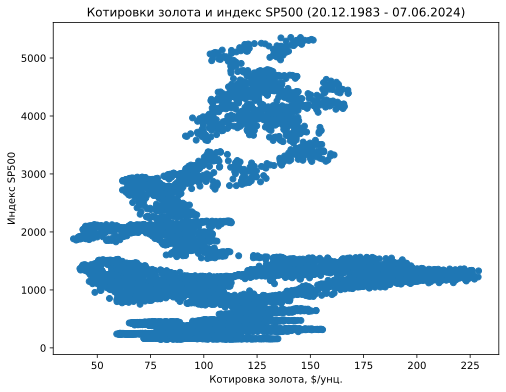

In [81]:
fig = plt.figure(figsize=FIG_SIZE)
plt.scatter(x=df['g_close'], y=df['sp_close'])
plt.xlabel('Котировка золота, $/унц.')
plt.ylabel('Индекс SP500')
plt.title("Котировки золота и индекс SP500 (20.12.1983 - 07.06.2024)")

### Диаграммы рассеяния изменений котировок

Абсолютные значения котировок, как мне кажется, не имеют исследовательского смысла. Кризисность ситуации измеряется не абсолютной величиной, а относительным изменением величины (либо, скоростью изменения величины).   

Добавляем в датафрейм два столбца: относительное изменение цены активов (в процентах) за определённое количество дней (моментум).

In [82]:
# def calc_5d(distance: int = 5, idx: int, value: float):
#     if idx < distance:
#         return np.na
#     return 0
calc = lambda v: (v.iloc[len(v) - 1] - v.iloc[0])/v.iloc[0]

# Моментум за 5 дней
dft = df.copy()
dft['g_5d'] = dft['g_close'].rolling(window=5).apply(lambda r: calc(r))
dft['sp_5d'] = dft['sp_close'].rolling(window=5).apply(lambda r: calc(r))
dft = dft.dropna(axis='index')
dft

g_close  g_vol     sp_close      sp_vol      g_5d     sp_5d
date                                                                      
1983-12-27  111.720001  13600   164.759995    63800000  0.024578  0.017037
1983-12-28  111.510002  25200   165.339996    85660000  0.002067  0.010883
1983-12-29  111.940002  27200   164.860001    86560000 -0.001427  0.008133
1983-12-30  111.820000  18900   164.929993    71840000  0.003230  0.010477
1984-01-03  110.150002  16800   164.039993    71340000 -0.014053 -0.004370
...                ...    ...          ...         ...       ...       ...
2024-06-03  145.070007      0  5283.399902  4046920000 -0.015607 -0.004267
2024-06-04  138.649994      0  5291.339844  3707900000 -0.039088  0.004631
2024-06-05  140.830002      0  5354.029785  3591460000 -0.034882  0.022644
2024-06-06  145.380005      0  5352.959961  3609990000  0.001516  0.014297
2024-06-07  136.199997      0  5346.990234  3692760000 -0.061143  0.012036

[10195 rows x 6 columns]

Text(0.5, 1.0, 'Моментум 5 дней')

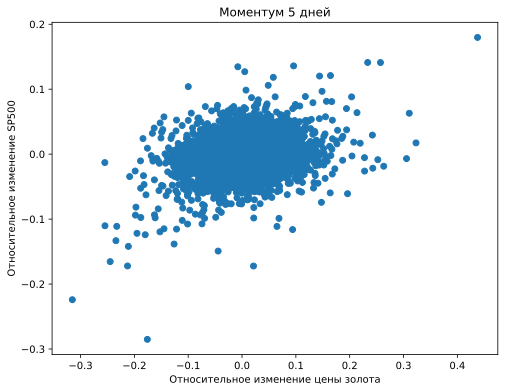

In [83]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x=dft['g_5d'], y=dft['sp_5d'])

plt.xlabel("Относительное изменение цены золота")
plt.ylabel("Относительное изменение SP500")
plt.title("Моментум 5 дней")

In [84]:
# Моментум 10 дней
dft = df.copy()
dft['g_10d'] = dft['g_close'].rolling(window=10).apply(lambda r: calc(r))
dft['sp_10d'] = dft['sp_close'].rolling(window=10).apply(lambda r: calc(r))
dft = dft.dropna(axis='index')
dft

g_close  g_vol     sp_close      sp_vol     g_10d    sp_10d
date                                                                      
1984-01-04  111.180000  23400   166.779999   112980000  0.019626  0.029506
1984-01-05  111.629997  25200   168.809998   159990000  0.003145  0.032098
1984-01-06  107.790001  28200   169.279999   137590000 -0.038448  0.035162
1984-01-09  104.279999  21300   168.899994   107100000 -0.064418  0.034800
1984-01-10  104.730003  20600   167.949997   109570000 -0.062567  0.019362
...                ...    ...          ...         ...       ...       ...
2024-06-03  145.070007      0  5283.399902  4046920000 -0.041557 -0.004659
2024-06-04  138.649994      0  5291.339844  3707900000 -0.078738 -0.005651
2024-06-05  140.830002      0  5354.029785  3591460000 -0.026745  0.008860
2024-06-06  145.380005      0  5352.959961  3609990000  0.024958  0.016158
2024-06-07  136.199997      0  5346.990234  3692760000 -0.050673  0.007968

[10190 rows x 6 columns]

Text(0.5, 1.0, 'Моментум 10 дней')

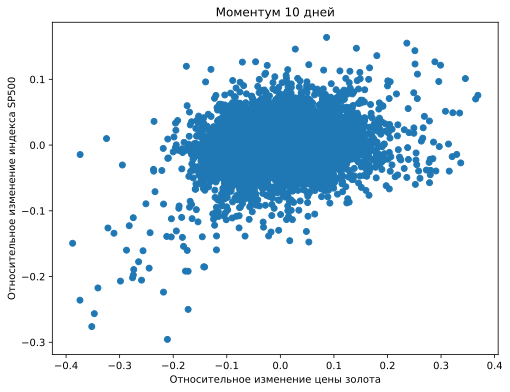

In [85]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x=dft['g_10d'], y=dft['sp_10d'])

plt.xlabel("Относительное изменение цены золота")
plt.ylabel("Относительное изменение индекса SP500")
plt.title("Моментум 10 дней")

In [86]:
# Моментум 22 дня
dft = df.copy()
dft['g_22d'] = df['g_close'].rolling(window=22).apply(lambda r: calc(r))
dft['sp_22d'] = df['sp_close'].rolling(window=22).apply(lambda r: calc(r))
dft = dft.dropna(axis='index')
dft

g_close  g_vol     sp_close      sp_vol     g_22d    sp_22d
date                                                                      
1984-01-20  108.589996  18400   166.210007    93360000 -0.004127  0.025988
1984-01-23  106.349998  20800   164.869995    82010000 -0.044303  0.008009
1984-01-24  106.470001  16400   165.940002   103050000 -0.050223  0.014737
1984-01-25  105.839996  24800   164.839996   113470000 -0.050422  0.009925
1984-01-26  110.820000  15600   164.240005   111100000 -0.008056 -0.003156
...                ...    ...          ...         ...       ...       ...
2024-06-03  145.070007      0  5283.399902  4046920000  0.080194  0.043284
2024-06-04  138.649994      0  5291.339844  3707900000  0.030395  0.031895
2024-06-05  140.830002      0  5354.029785  3591460000  0.022953  0.033449
2024-06-06  145.380005      0  5352.959961  3609990000  0.055390  0.031856
2024-06-07  136.199997      0  5346.990234  3692760000 -0.010893  0.030711

[10178 rows x 6 columns]

Text(0.5, 1.0, 'Моментум 22 дня')

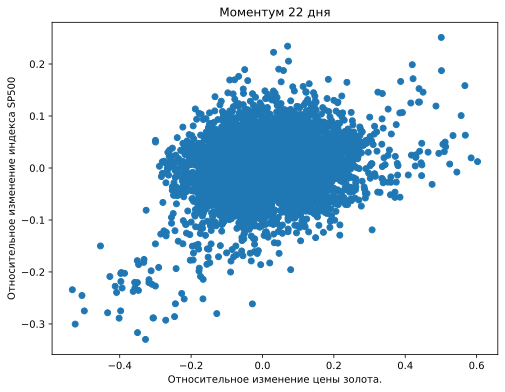

In [87]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x=dft['g_22d'], y=dft['sp_22d'])

plt.xlabel("Относительное изменение цены золота.")
plt.ylabel("Относительное изменение индекса SP500")
plt.title("Моментум 22 дня")

### Предварительный вывод  
Уже достаточно явно видна положительная корреляция индекса SP500 и цены на золото. То есть, если индекс SP500 растёт, то и цена на золото растёт; если индекс SP500 падает, то и цена на золото падает.  

Вывод: в условиях кризиса золото служить защитным активом не может.

## Гипотеза о нормальности распределения изменений котировок

### Аналитическая проверка

Вопрос: являются ли распределения изменений котировок нормальными?  
Гипотезы:  
$H_0$ - распределение изменений котировок подчиняется нормальному закону  
$H_1$ - распределение изменений котировок не подчиняется нормальному закону  

In [109]:
H0 = "Подтверждается нулевая гипотеза о нормальности\
 распределения изменений цены на золото."
H1 = "Подтверждается альтернативная гипотеза о нормальности\
 распределения изменений цен на золото."

alpha = 0.05

st, p_value = stats.normaltest(dft['g_22d'])

if p_value > 0.05:
    print(H0, ' ', p_value)
else:
    print(H1, ' ', p_value)


Подтверждается альтернативная гипотеза о нормальности распределения изменений цен на золото.   2.6330934265997473e-158


### Анализ графиков

Text(0.5, 1.0, 'Гистограмма распределения\n изменения котировок золота (Моментум 22 дня)')

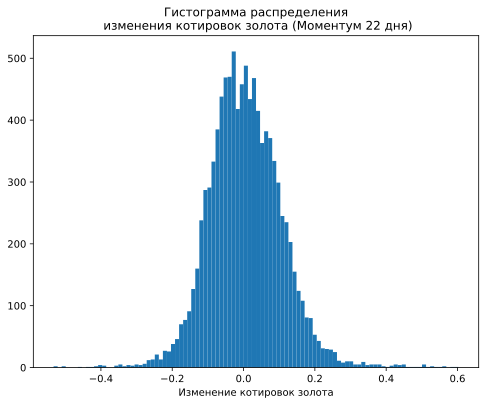

In [89]:
plt.figure(figsize=FIG_SIZE)

plt.hist(dft['g_22d'], bins=100)
plt.xlabel("Изменение котировок золота")
plt.title("""Гистограмма распределения
 изменения котировок золота (Моментум 22 дня)""")

Интересно, что аналитический тест на нормальность распределения не подтвердил его, а визуально, распределение - близко к нормальному.

Попытка 2. Трактуем котировки как генеральную совокупность и предполагаем, что характер её распределения неизвестен.
Т. о. для теста нам необходима выборка из генеральной совокупности.

In [90]:
st, p_value = stats.normaltest(dft['g_22d'].sample(frac=0.1, random_state=12345))
print(p_value)

st, p_value = stats.shapiro(dft['g_22d'].sample(frac=0.1, random_state=12345))
print(p_value)

6.992196669528982e-13
6.203227715951459e-10


Повторный тест подтверждает альтернативную гипотезу.

Text(0.5, 0, 'Усы: квартили 0.05...0.95')

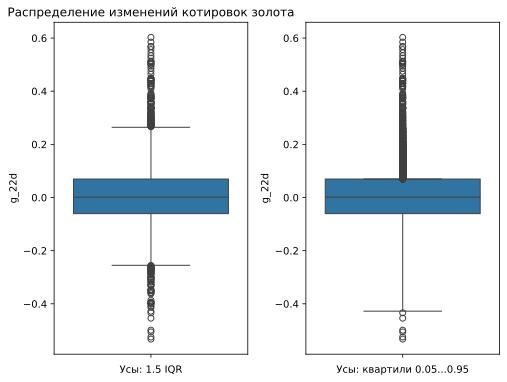

In [104]:
plt.figure(figsize=FIG_SIZE)

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
sns.boxplot(data=dft['g_22d'])
plt.xlabel("Усы: 1.5 IQR")
plt.title("Распределение изменений котировок золота")

plt.subplot(1, 2, 2)
sns.boxplot(data=dft['g_22d'], whis=[0.05, 0.95])
plt.xlabel("Усы: квартили 0.05...0.95")

По бокс-плотам видно, что 90% изменений котировок укладываются в диапазон от -0.42 до +0.08 (приблизительно).

Text(0.5, 0, 'Усы: квартили 0.05...0.95')

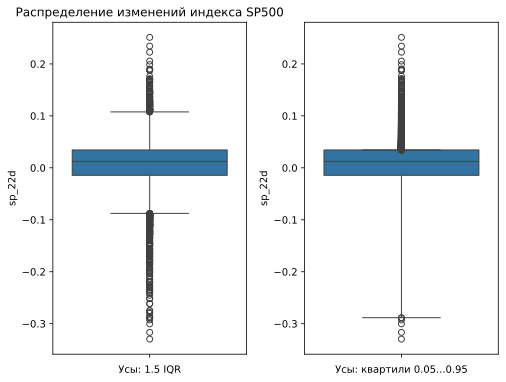

In [107]:
plt.figure(figsize=FIG_SIZE)

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
sns.boxplot(data=dft['sp_22d'])
plt.xlabel("Усы: 1.5 IQR")
plt.title("Распределение изменений индекса SP500")

plt.subplot(1, 2, 2)
sns.boxplot(data=dft['sp_22d'], whis=[0.05, 0.95])
plt.xlabel("Усы: квартили 0.05...0.95")

Аналогично, 90% изменений индекса SP500 попадают в диапазон от -0.28 до 0,03.



### Выводы

Всё это говорит о том, что котировки гораздо "охотнее" вместе идут вниз, чем вместе вверх, что "проваливаются" котировки вместе гораздо глубже, чем потом отрастают вместе вверх.

Более того, видно, что нижний ус по золоту гораздо ниже (глубже), чем у SP500. То есть, в кризисной ситуации золото проваливается вниз больше в 0,42/0,28=1,5 раза, чем индекс SP500. И, аналогично с верхним усом, видно, что при росте рынка золото отрастает гораздо быстрее индекса SP500 (в 0,08/0,03=2,67 раза)

Строго говоря (удивительно и возможно) имеет смысл на дне кризиса закупать золото, которое отрастает быстрее индекса SP500?

In [73]:
dft[abs(dft['sp_22d']) > 0.05].index

DatetimeIndex(['1984-02-06', '1984-02-07', '1984-02-08', '1984-02-09',
               '1984-02-10', '1984-02-13', '1984-02-14', '1984-02-15',
               '1984-02-16', '1984-02-17',
               ...
               '2024-03-01', '2024-03-20', '2024-03-21', '2024-05-15',
               '2024-05-16', '2024-05-17', '2024-05-20', '2024-05-21',
               '2024-05-24', '2024-05-31'],
              dtype='datetime64[ns]', name='date', length=2179, freq=None)

In [80]:
# Изменение индекса меньше данного значения будет удалено из фрейма
TRASH = 0.05

# dft = df.copy()
# dfn = dft[abs(dft['sp_22d']) > 0.05]
# dfn

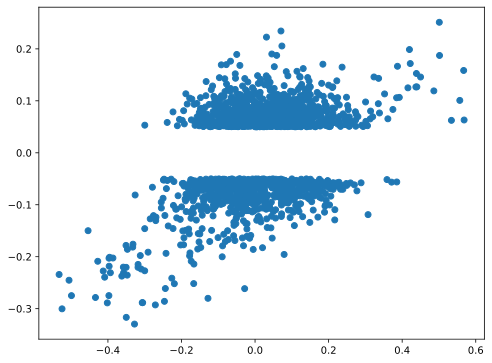

In [75]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x=dfn['g_22d'], y=dfn['sp_22d'])

In [81]:
TRASH = 0.10

# dfn = dft[abs(dft['sp_22d']) > TRASH]
# dfn

Text(0, 0.5, 'sp500')

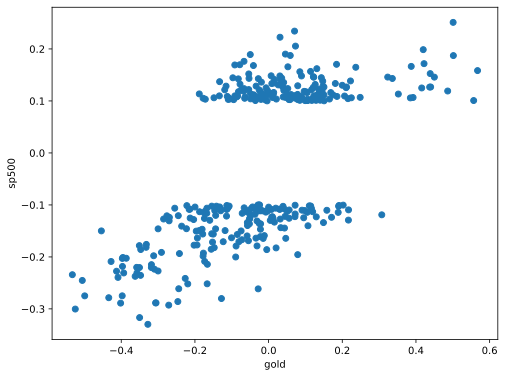

In [79]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x=dfn['g_22d'], y=dfn['sp_22d'])

plt.xlabel('gold')
plt.ylabel('sp500')